In [28]:
import networkx as nx
import numpy as np
import sympy as sp
import math
import random
import matplotlib.pyplot as plt

In [2]:
n = 10000
p = 0.00005
G = nx.erdos_renyi_graph(n, p)

In [3]:
components = nx.connected_components(G)

In [4]:
component_sizes = [len(component) for component in components]

In [5]:
component_distribution = {}
for size in component_sizes:
    if size in component_distribution:
        component_distribution[size] += 1
    else:
        component_distribution[size] = 1

In [6]:
max_size = max(component_distribution.keys())

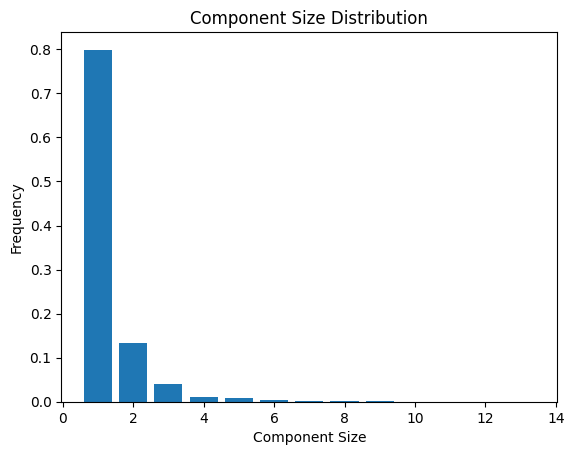

In [7]:
sizes, counts = zip(*sorted(component_distribution.items()))
counts = [count/len(component_sizes) for count in counts]
plt.bar(sizes, counts)
plt.xlabel('Component Size')
plt.ylabel('Frequency')
plt.title('Component Size Distribution')
plt.show()

In [8]:
degrees = dict(G.degree())

In [9]:
degrees = [d for n, d in G.degree()]
max_degree = max(degrees) + 1
freq = [degrees.count(d)/n for d in range(max_degree)]
x = sp.symbols('x')
G_0 = sum(freq[k] * x ** k for k in range(max_degree))
G_0_prime = sp.diff(G_0, x)
G_0_prime_at_1 = G_0_prime.subs(x, 1)
G_1 = G_0_prime / G_0_prime_at_1

In [10]:
G_0

0.000157950692633498*x**5 + 0.00157950692633498*x**4 + 0.0126360554106799*x**3 + 0.0758163324640792*x**2 + 0.303265329856317*x + 0.606530659712633

In [11]:
G_1

0.00157977883096367*x**4 + 0.0126382306477093*x**3 + 0.0758293838862559*x**2 + 0.303317535545024*x + 0.606635071090047

In [12]:
sp.Poly(G_1, x).degree()

4

In [13]:
H_1 = x

In [14]:
P_list = []

In [15]:
while sp.Poly(H_1, x).degree() < max_size:
    H_1 = x * G_1.subs(x, H_1)

In [16]:
H_1 = sp.expand(H_1)
print("hi")
H_0 = x * G_0.subs(x, H_1)
H_0 = sp.expand(H_0)
den = 1
print("hi")
for i in range(max_size):
    print("Hi")
    H_0_prime = H_0
    den *= (i+1)
    for j in range(i+1):
        H_0_prime = sp.diff(H_0_prime, x)
    H_0_prime = H_0_prime.subs(x, 0)
    P_s = 1 / den * H_0_prime
    P_list.append(P_s)

hi
hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi
Hi


In [17]:
P_list

[0.606530659712633,
 0.183971384936533,
 0.0837026206346313,
 0.0561102875554953,
 0.0326711869778819,
 0.0177538264849364,
 0.00943219788352175,
 0.00489176513506181,
 0.00249151451508323,
 0.00124680518729190,
 0.000614467175787467,
 0.000298796344442113,
 0.000143476183234610]

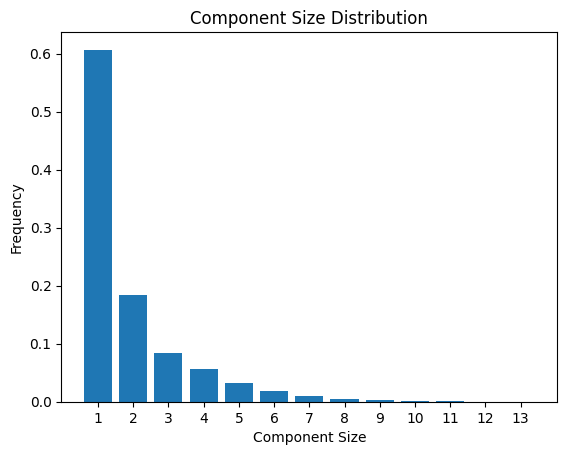

In [18]:
positions = [str(i) for i in range(1, len(P_list) + 1)]

plt.bar(positions, P_list)
plt.xlabel('Component Size')
plt.ylabel('Frequency')
plt.title('Component Size Distribution')
plt.show()

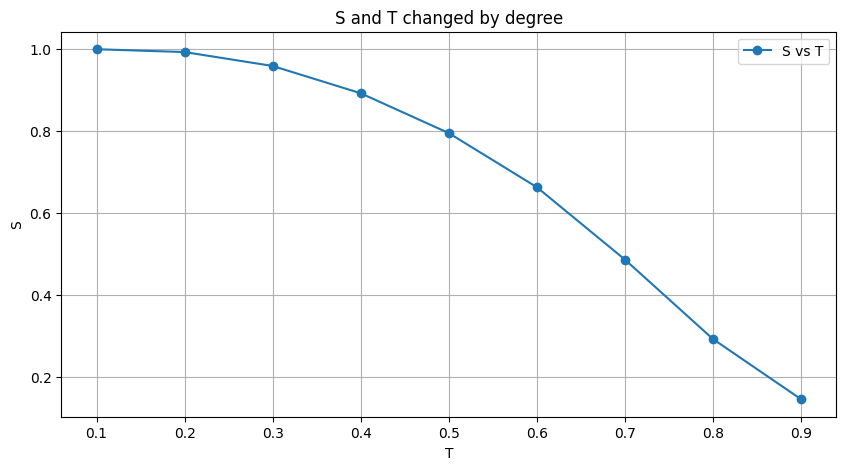

In [19]:
S_list = []
T_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for T in T_list:
    S = 0.1
    for i in range(10):
        S = 1 - math.exp(-1 * S / T)
    S_list.append(S)

plt.figure(figsize=(10, 5)) 
plt.plot(T_list, S_list, label='S vs T', marker='o') 

# plt.plot(degrees, T_list, label='T', marker='s', linestyle='--')  

plt.title('S and T changed by degree')
plt.xlabel('T')
plt.ylabel('S')

plt.legend()

plt.grid(True)
plt.show()

In [20]:
N = 1001

G_0 = 0
for k in range(2, int(math.sqrt(N))):
    p_k = k**(-2.5)
    G_0 += p_k * x**k
G_0_prime = sp.diff(G_0, x)
G_0_prime_twice = sp.diff(G_0_prime, x)
G_0_prime_at_1 = G_0_prime.subs(x, 1)
G_1 = G_0_prime / G_0_prime_at_1
G_0_prime_twice_at_1 = G_0_prime_twice.subs(x, 1)
T_c = G_0_prime_at_1 / G_0_prime_twice_at_1

In [30]:
T_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
N = 2000
gamma = 2.5
max_degree = int(np.sqrt(N))

In [49]:
degrees = np.array([k**(-gamma) for k in range(1, max_degree + 1)])
degrees = degrees[1:]
degrees = degrees / np.sum(degrees)
degree_sequence = np.random.choice(np.arange(2, max_degree+1), size=N, p=degrees)

In [50]:
min(degree_sequence)

2

In [56]:
G = nx.Graph()

for node, degree in enumerate(degree_sequence):
    G.add_node(node)

for node, degree in enumerate(degree_sequence):
    neighbors = random.sample(G.nodes(), degree)
    random_float = random.random()
    if random_float < T_list[0]:
        G.add_edges_from([(node, neighbor) for neighbor in neighbors if node != neighbor])

C:\Users\25540\AppData\Local\Temp\ipykernel_25400\653284676.py:7: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  neighbors = random.sample(G.nodes(), degree)


In [58]:
# 找到所有的连通组件
components = list(nx.connected_components(G))

# 找到最大的连通组件
largest_component = max(components, key=len)

# 提取最大的连通组件
largest_component_G = G.subgraph(largest_component)

In [60]:
len(largest_component)

579

In [57]:
assert G.number_of_nodes() == N, "Number of nodes is not equal to N"

In [ ]:
# 获取所有边
edges = list(G.edges())

# 遍历所有边并根据概率删除边
for edge in edges:
    if random.random() < T_list[0]:
        G.remove_edge(*edge)

In [21]:
T_c

0.170451808845373

In [22]:
H_1 = x

In [23]:
while sp.Poly(H_1, x).degree() < max_size:
    H_1 = x * G_1.subs(x, H_1)

H_1_at_1 = H_1.subs(x, 1)
S = 1 - G_0.subs(x, H_1_at_1)
S_T = 1 - G_0.subs(x, 1 + (H_1_at_1 - 1) * x)

In [24]:
H_1_at_1

1.00000000000000

In [25]:
G_0

0.000202860206483395*x**30 + 0.000220803018046435*x**29 + 0.000241048771051803*x**28 + 0.000263991892633574*x**27 + 0.000290112625944059*x**26 + 0.00032*x**25 + 0.000354382196583214*x**24 + 0.000394167134323393*x**23 + 0.00044049734784217*x**22 + 0.00049482514792742*x**21 + 0.000559016994374947*x**20 + 0.000635500647840891*x**19 + 0.000727476112331839*x**18 + 0.000839223616042675*x**17 + 0.0009765625*x**16 + 0.00114755062109849*x**15 + 0.00136357776485931*x**14 + 0.00164112484090304*x**13 + 0.0020046884346862*x**12 + 0.0024918292940311*x**11 + 0.00316227766016838*x**10 + 0.00411522633744856*x**9 + 0.0055242717280199*x**8 + 0.0077135606736577*x**7 + 0.0113402302906629*x**6 + 0.0178885438199983*x**5 + 0.03125*x**4 + 0.0641500299099584*x**3 + 0.176776695296637*x**2

In [26]:
S_T

0.662469925116445

In [27]:
S

0.662469925116445